# Graph Lab

## Header information:

  - Author #1: Jad Kharboutly (kharbouj@mcmaster.ca)
  - Author #2: Arash Ghafoori (ghafoa@mcmaster.ca)
  - Gitlab URL: http://gitlab.cas.mcmaster.ca/...
  - Avenue to Learn group name: 

In [35]:
### Graph Initialization ###

In [21]:
from GraphBuilder import GraphBuilder
from MetricsExtractor import Metrics_Extractor

stations_attr, stations = Metrics_Extractor('./_dataset/london.stations.csv').metrics
connections_attr, connections = Metrics_Extractor('./_dataset/london.connections.csv').metrics

graph = GraphBuilder(stations, connections)

In [36]:
### Graph Metrics ###

In [4]:
print("Number of nodes (aka. stations): ", graph.getNumberOfNodes())
print("Number of edges (aka. connections): ", graph.getNumberOfEdges())
print("Average node degree", graph.getAverageNodeDegree())

Number of nodes (aka. stations):  302
Number of edges (aka. connections):  406
Average node degree 1.3443708609271523


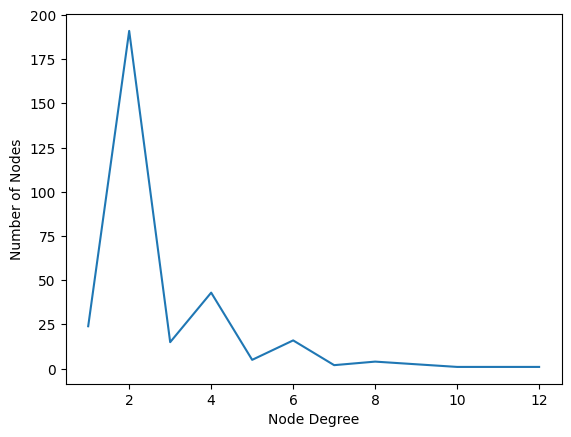

In [22]:
import matplotlib.pyplot as plt

data = {}

for node, neighbors in graph.adj_list.items():
    degree = 0
    for neighbors, time in neighbors.items():
        for time, neighbor in time.items():
            for neighbor, lines in neighbor.items():
                degree += len(lines)
                
    data[degree] = data.get(degree, 0) + 1

x, y = sorted(data.keys()), []

for num in x:
    y.append(data[num])
    
plt.plot(x, y)
plt.xlabel("Node Degree")
plt.ylabel("Number of Nodes")

plt.show()

# Design Choices:

Why is it undirected?

## Why an Adjacency List?

#### Adjacency Matrix

An adjacency matrix can be represented as a 2-D array where the rows and columns represent the nodes $n$, therefore it will have a size of $n^{2}$. If an edge exists between the row and the column then the cell will have a value of $1$ or if it's weight if it is an edge-weighted graph, otherwise it will have a value of $0$. We can check if there's a connection between two nodes is $O(1)$. To build such a structure, it will require a time of $O(n^{2})$.




#### Adjancey List

Vertices are represented as objects, where each object contains data regarding the other nodes adjacent to it, therefore it will have a size of $n$ + $m$. To check wether an edge exists between two nodes is $O(n)$, and $O(n^{2})$ in the case that it is a complete graph. To build the list it takes a time complexity proportional to the number of connections/edges.


For this problem, using an adjacency list seems to be most reasonable since we are dealing with an edge-weighted undirected graph that is not complete. Therefore the cost to build the graph $m$, to search is $O(n)$ and it has a space complexity of $n$ + $m$.

## Construction of the Adjacency List For This Particular Problem

We used a hashmap/dictionary in order to represent the list. The keys represent all the nodes $n$, and the values for each key is the data.

In [5]:
# adj_list = {
#     station_1 : {...},
#     station_2: {...}
#     .
#     .
#     .
# }

The data is represented as a hashmap, where the keys are the adjacent nodes to the respective key in the adjacency list.

In [16]:
# station_1:{
#     station_2:
#     {...},
#     staion_5:{...}
#     }
#     .
#     .
#     .
# }

The value of the adjacent nodes is a hashmap that represents the time it takes to go from station to the other. We could sort the keys of the time dictionary in order to get the lowest time.


In [13]:
# time:{
#     1:[line1, line2],
#     3:[line4]
# }

The values of the time is an array of the different lines connect the two stations.

In [18]:
# adj_list = {
#     station_1:{
#         station_2:{
#             "time":{
#                 1:[line1, line2],
#                 3:[line4]
#             }
#         }
#     },
#     station_2:{...}
#     .
#     .
#     .
# }

## What is the shortest path?

*Priority in decreasing order*

#1 : Least amount of time needed to go from one station to the other

#2 : If there are multiple paths with the least amount of time, we consider the shortest path to be the one with the least number of lines needed to get to the destination.

## How do we find the shortest path

#### Dijkstra’s algorithm

#### A* Algorithm